In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [3]:
#Read CSV file
df=pd.read_csv("C:/Users/Icon/Downloads/train_PDjVQMB.csv")
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [3]:
#Check types for all columns
df.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [4]:
#prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [5]:
#Returns the number of missing values in each column
df.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

<AxesSubplot:>

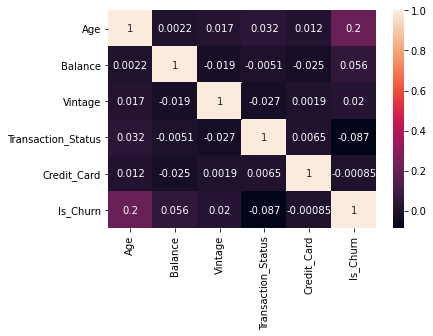

In [4]:
# find the pairwise correlation of all columns in the dataframe.
sns.heatmap(df.corr(),annot=True)

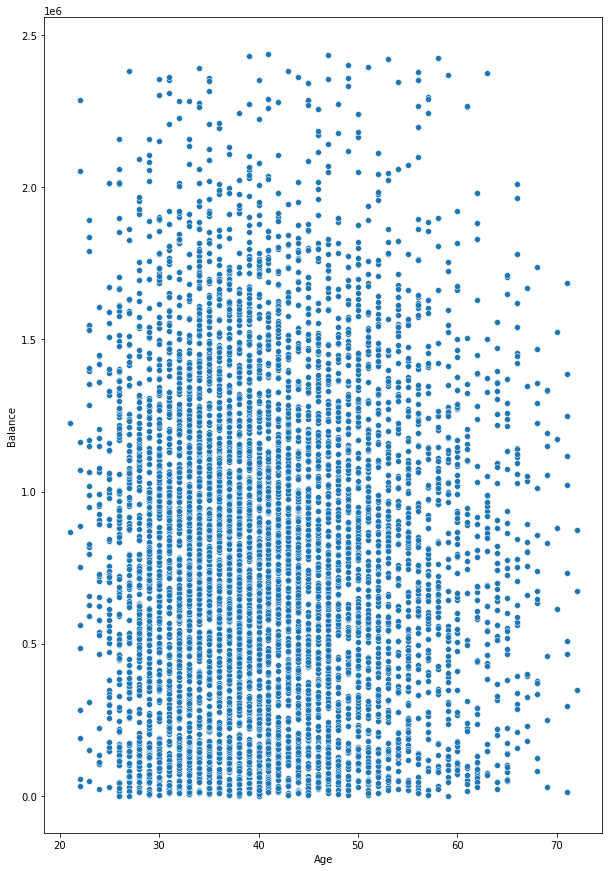

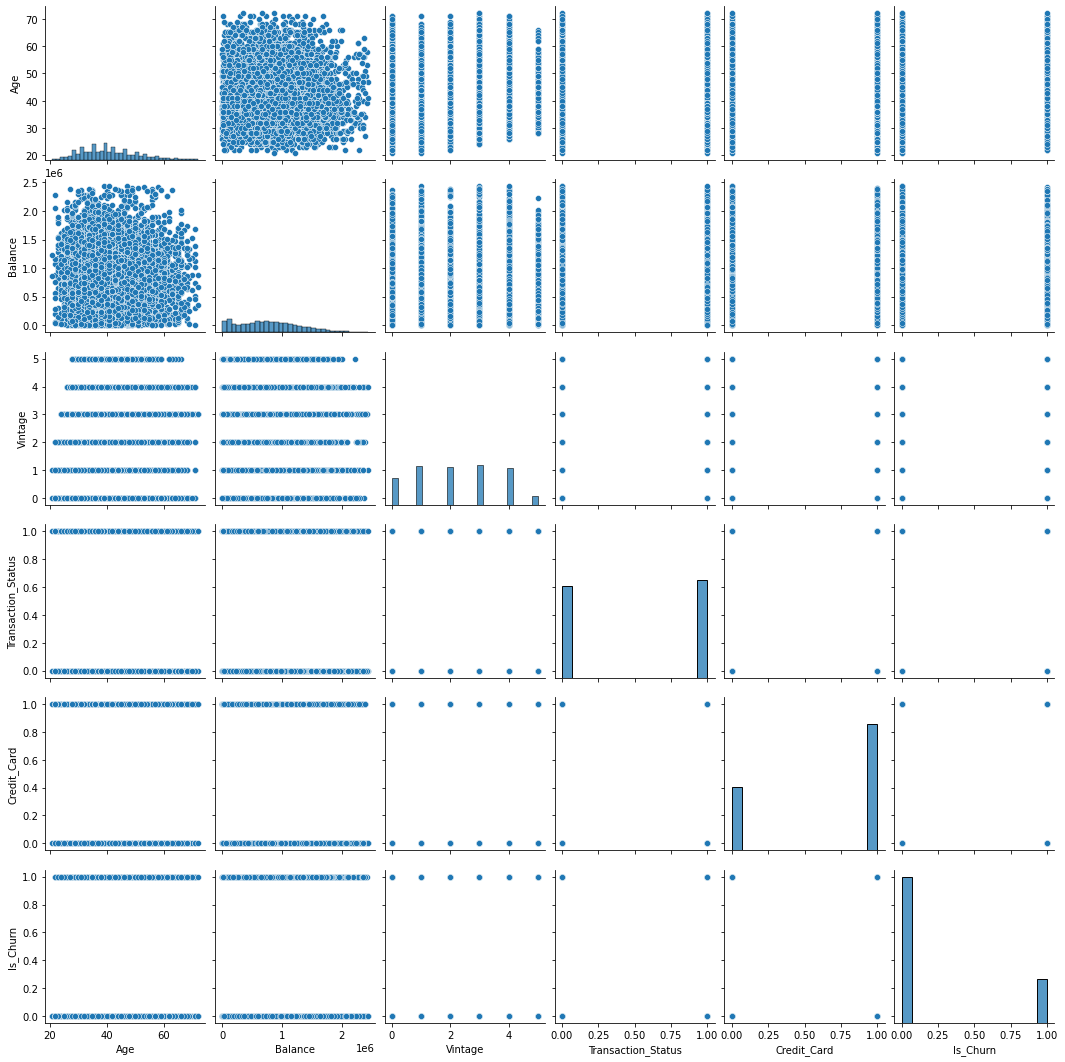

In [7]:
#Visualization
fig=plt.figure(figsize=(10,15))
sns.scatterplot(x='Age',y='Balance',data=df)
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

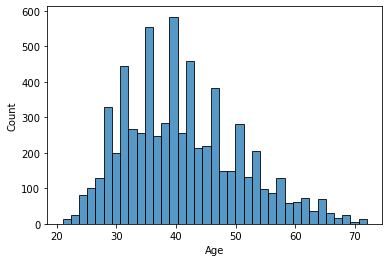

In [8]:
sns.histplot(df['Age'])

In [9]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Gender'>

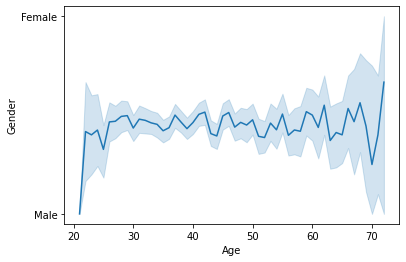

In [10]:
# lineplot
sns.lineplot(x='Age',y='Gender',data=df)

In [11]:
df[df.duplicated()].shape    
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [12]:
#Feature Engg.
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['ID']=label_encoder.fit_transform(df['ID'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Income']=label_encoder.fit_transform(df['Income'])
df['Product_Holdings']=label_encoder.fit_transform(df['Product_Holdings'])
df['Credit_Category']=label_encoder.fit_transform(df['Credit_Category'])

In [13]:
df.dtypes

ID                      int32
Age                     int64
Gender                  int32
Income                  int32
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int32
Credit_Card             int64
Credit_Category         int32
Is_Churn                int64
dtype: object

In [14]:
# Normalization
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler().fit_transform(df)
mscaler     

array([[0.51797263, 0.29411765, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33779516, 0.62745098, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.55512107, 0.2745098 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.82433449, 0.15686275, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33914874, 0.88235294, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.33599037, 0.31372549, 1.        , ..., 0.        , 0.5       ,
        0.        ]])

In [15]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
xx=StandardScaler().fit_transform(df)
xx 

array([[ 0.06224965, -0.52970736, -1.0903853 , ..., -1.4069082 ,
        -1.33796052,  1.82389974],
       [-0.56180957,  1.22558098, -1.0903853 , ...,  0.71077843,
         0.97817574, -0.54827575],
       [ 0.19091628, -0.63295962, -1.0903853 , ..., -1.4069082 ,
         0.97817574, -0.54827575],
       ...,
       [ 1.12335868, -1.25247315,  0.91710701, ..., -1.4069082 ,
         0.97817574, -0.54827575],
       [-0.55712131,  2.5678603 , -1.0903853 , ...,  0.71077843,
         0.97817574,  1.82389974],
       [-0.56806058, -0.4264551 ,  0.91710701, ..., -1.4069082 ,
        -0.17989239, -0.54827575]])

In [16]:
df['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [17]:
#Split Data
x=df.drop(columns=['Is_Churn'])
y=df['Is_Churn']

In [18]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x,y=os.fit_resample(x,y)

In [19]:
from collections import Counter
print('original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y)))

original dataset shapeCounter({1: 5113, 0: 5113})
Resampled dataset shapeCounter({1: 5113, 0: 5113})


In [20]:
#Building multiple models 
import warnings 
warnings.filterwarnings('ignore')
models={"decisiontreeClassifier":DecisionTreeClassifier(),"SVM":SVC(),"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),
        "RandomForestClassifer":RandomForestClassifier(),"AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":
       GradientBoostingClassifier(),"XGBClassifier":XGBClassifier()}
#Model accuracy-> models,x,y,scaleflag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("StandardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The accuracy for",name,"is:",acc)
        acc_result[name]=acc
    return acc_result
#pass the input parameter
Norm=modelAccuracy(models,x,y,0)
MS=modelAccuracy(models,x,y,1)
ST=modelAccuracy(models,x,y,2)

The accuracy for decisiontreeClassifier is: 0.8475073313782991
The accuracy for SVM is: 0.520039100684262
The accuracy for KNN is: 0.647605083088954
The accuracy for GNB is: 0.5777126099706745
The accuracy for RandomForestClassifer is: 0.9154447702834799
The accuracy for AdaBoostClassifier is: 0.6124144672531769
The accuracy for GradientBoostingClassifier is: 0.6412512218963832
[15:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy for XGBClassifier is: 0.8137829912023461
The accuracy for decisiontreeClassifier is: 0.8479960899315738
The accuracy for SVM is: 0.6324535679374389
The accuracy for KNN is: 0.6813294232649071
The accuracy for GNB is: 0.6026392961876833
The accuracy for RandomForestClassifer is: 0.915933528836754

In [21]:
#find high accuracy model
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is",model_name,"with Accuracy",high)
print('=Without Scaling',bestModel(Norm))
print('=Min Max Scaling',bestModel(MS))
print('=STD scaling',bestModel(ST))

Best model is RandomForestClassifer with Accuracy 0.9154447702834799
=Without Scaling None
Best model is RandomForestClassifer with Accuracy 0.9159335288367546
=Min Max Scaling None
Best model is RandomForestClassifer with Accuracy 0.9217986314760508
=STD scaling None


Accuracy is: 0.9242424242424242
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1017
           1       0.90      0.95      0.93      1029

    accuracy                           0.92      2046
   macro avg       0.93      0.92      0.92      2046
weighted avg       0.93      0.92      0.92      2046



<AxesSubplot:>

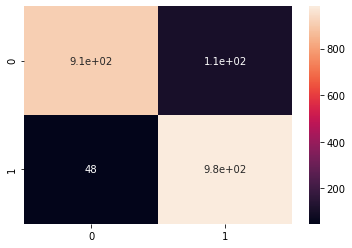

In [22]:
# Evaluation of best model on Testing Dataset
    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
Model=RandomForestClassifier()
Model.fit(xtrain,ytrain)
ypred=Model.predict(xtest)
print("Accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

## Evaluation of best model  on testing dataset

In [23]:
df1=pd.read_csv("C:/Users/Icon/Downloads/test_lTY72QC.csv")
df1

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [25]:
df1.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
dtype: object

In [26]:
# Feature Engg.
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df1['ID']=label_encoder.fit_transform(df1['ID'])
df1['Gender']=label_encoder.fit_transform(df1['Gender'])
df1['Income']=label_encoder.fit_transform(df1['Income'])
df1['Product_Holdings']=label_encoder.fit_transform(df1['Product_Holdings'])
df1['Credit_Category']=label_encoder.fit_transform(df1['Credit_Category'])

In [27]:
df1.dtypes

ID                      int32
Age                     int64
Gender                  int32
Income                  int32
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int32
Credit_Card             int64
Credit_Category         int32
dtype: object

In [28]:
df1.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

Accuracy is: 0.9159335288367546
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1017
           1       0.89      0.95      0.92      1029

    accuracy                           0.92      2046
   macro avg       0.92      0.92      0.92      2046
weighted avg       0.92      0.92      0.92      2046



<AxesSubplot:>

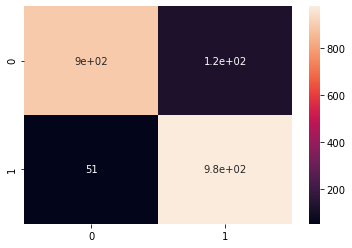

In [29]:
# Evaluation of best model on Testing Dataset
    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
Model=RandomForestClassifier()
Model.fit(xtrain,ytrain)
ypred=Model.predict(xtest)
print("Accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [38]:
dff=pd.DataFrame(ypred,columns=['Is_Churn'])

In [39]:
dff

,Is_Churn
0,0
1,1
2,0
3,0
4,1
...,...
2041,1
2042,0
2043,1
2044,1


In [36]:
dff1=pd.DataFrame(ypred,columns=['ID'])
dff1

,ID
0,0
1,1
2,0
3,0
4,1
...,...
2041,1
2042,0
2043,1
2044,1


In [45]:
df1.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category'],
      dtype='object')

In [48]:
a=df1['ID']
a

0        964
1       1745
2       1856
3       1991
4       2448
        ... 
2846     280
2847     930
2848    2756
2849    2683
2850     598
Name: ID, Length: 2851, dtype: int32

In [53]:
dff

,Is_Churn
0,0
1,1
2,0
3,0
4,1
...,...
2041,1
2042,0
2043,1
2044,1


In [52]:
df1['Churn']=dff1
df1

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Churn
0,964,50,0,3,1008636.39,2,1,1,1,0,0.0
1,1745,36,1,1,341460.72,2,0,1,1,0,1.0
2,1856,25,0,0,439460.10,0,0,1,1,1,0.0
3,1991,41,1,2,28581.93,0,1,1,1,2,0.0
4,2448,48,1,3,1104540.03,2,1,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2846,280,40,0,0,1338458.22,0,0,0,1,2,NaN
2847,930,48,0,3,1448280.27,0,1,1,1,0,NaN
2848,2756,59,1,3,1100555.64,3,0,0,1,2,NaN
2849,2683,34,0,1,1502818.92,2,0,0,1,2,NaN


In [57]:
df1.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Churn'],
      dtype='object')

In [59]:
da=df1.drop(['Age','Gender','Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category'],axis=1)
da

,ID,Churn
0,964,0.0
1,1745,1.0
2,1856,0.0
3,1991,0.0
4,2448,1.0
...,...,...
2846,280,NaN
2847,930,NaN
2848,2756,NaN
2849,2683,NaN


In [60]:
dc=pd.concat([dff1,dff])
dc

,ID,Is_Churn
0,0.0,NaN
1,1.0,NaN
2,0.0,NaN
3,0.0,NaN
4,1.0,NaN
...,...,...
2041,NaN,1.0
2042,NaN,0.0
2043,NaN,1.0
2044,NaN,1.0


In [63]:
da.to_csv("C:/Users/Icon/Downloads/finalsample.csv")

In [64]:
da

,ID,Churn
0,964,0.0
1,1745,1.0
2,1856,0.0
3,1991,0.0
4,2448,1.0
...,...,...
2846,280,NaN
2847,930,NaN
2848,2756,NaN
2849,2683,NaN
